In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML_and_DL_Learning/diabetes_prediction_dataset.csv")

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
le = preprocessing.LabelEncoder()
df['gender']=le.fit_transform(df['gender'])

In [5]:
df["smoking_history"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [6]:
def encode(x):
    if x == "No Info":
        return 0
    elif x == "never":
        return 1
    elif x == "former":
        return 2
    elif x == "current":
        return 3
    elif x == "not current":
        return 4
    else:
        return 5

In [7]:
df["smonking_encode"] = df.apply(lambda x: encode(x["smoking_history"]), axis = 1)

In [8]:
df.drop('smoking_history', axis=1, inplace=True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smonking_encode
0,0,80.0,0,1,25.19,6.6,140,0,1
1,0,54.0,0,0,27.32,6.6,80,0,0
2,1,28.0,0,0,27.32,5.7,158,0,1
3,0,36.0,0,0,23.45,5.0,155,0,3
4,1,76.0,1,1,20.14,4.8,155,0,3


In [9]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

df_sc = scale.fit_transform(df)
df_sc = pd.DataFrame(df_sc, columns=df.columns)

df_sc['diabetes'] = df['diabetes']

In [10]:
y = df_sc['diabetes']

X = df_sc.drop('diabetes', axis=1)

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smonking_encode
0,0,80.0,0,1,25.19,6.6,140,0,1
1,0,54.0,0,0,27.32,6.6,80,0,0
2,1,28.0,0,0,27.32,5.7,158,0,1
3,0,36.0,0,0,23.45,5.0,155,0,3
4,1,76.0,1,1,20.14,4.8,155,0,3


In [ ]:
df_sc.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,-0.841762,1.634286,-0.401645,3.390371,-0.645939,0.848778,-0.056826
1,-0.841762,-0.703759,-0.401645,-0.294953,-0.283799,0.848778,-1.393736
2,1.186752,1.274586,2.489761,3.390371,-1.504534,-0.737792,0.277401
3,-0.841762,1.544361,-0.401645,-0.294953,-0.872064,0.055493,-1.282327
4,-0.841762,-0.793684,-0.401645,-0.294953,-0.283799,0.408064,-1.282327


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

**Random Forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_pred = rf_model.predict(X_Test)

print("RF Accuracy Rate: ", accuracy_score(y_test, rf_pred)*100)
print("RF Precision Rate: ", precision_score(y_test, rf_pred)*100)
print("RF Recall Rate: ", recall_score(y_test, rf_pred)*100)
print("RF F1 Score Rate: ", f1_score(y_test, rf_pred)*100)

RF Accuracy Rate:  96.98
RF Precision Rate:  95.26281635301753
RF Recall Rate:  68.27906976744185
RF F1 Score Rate:  79.54483879707396


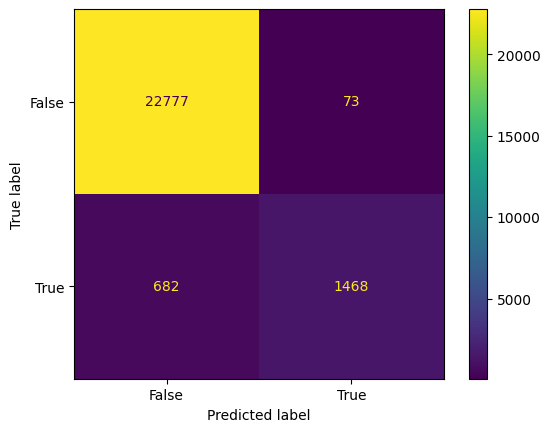

In [13]:
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
rf_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = rf_cm, display_labels = [False, True])

rf_cm_display.plot()
plt.show()

In [16]:
rf_params = {'bootstrap': [True],
    'max_depth': [6,5,4],
    'n_jobs' : [0.5, 1, 2 ,3],
    'n_estimators': [500, 600, 750, 1000]}
rf_gridcv_model = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of random forest grid search model: ",rf_gridcv_model.best_params_)
print('rf gridcv model accuracy score = {}'.format(rf_gridcv_model.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

best params of random forest grid search model:  {'bootstrap': True, 'max_depth': 6, 'n_estimators': 500, 'n_jobs': 1}
rf gridcv model accuracy score = 0.9721066666666666


**Decision Tree**

In [14]:
from sklearn.tree import DecisionTreeClassifier

dectree_model = DecisionTreeClassifier().fit(X_train, y_train)

dectree_pred = dectree_model.predict(X_Test)

print("DTREE Accuracy Rate: ", accuracy_score(y_test, dectree_pred)*100)
print("DTREE Precision Rate: ", precision_score(y_test, dectree_pred)*100)
print("DTREE Recall Rate: ", recall_score(y_test, dectree_pred)*100)
print("DTREE F1 Score Rate: ", f1_score(y_test, dectree_pred)*100)

DTREE Accuracy Rate:  95.16799999999999
DTREE Precision Rate:  71.29294755877035
DTREE Recall Rate:  73.34883720930233
DTREE F1 Score Rate:  72.30628152223751


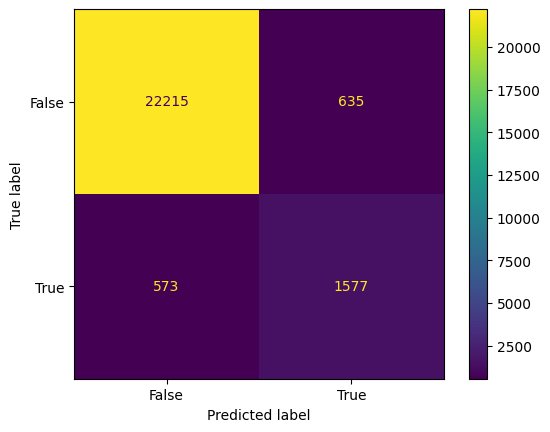

In [15]:
dectree_cm = metrics.confusion_matrix(y_test, dectree_pred)
dectree_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = dectree_cm, display_labels = [False, True])

dectree_cm_display.plot()
plt.show()

In [ ]:
dt_params = {
    'max_depth' : [3, 10, 20, 50],
    'min_samples_leaf' : [1, 5, 7]}
dt_gridcv_model = GridSearchCV(estimator=dectree_model, param_grid=dt_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of decision tree grid search model: {}".format(dt_gridcv_model.best_params_))
print('Decision Tree gridcv model accuracy score = {}'.format(dt_gridcv_model.best_score_))

**Support Vector Machine**

In [17]:
from sklearn import svm
svm_model= svm.SVC(kernel='poly',degree=3,gamma='auto').fit(X_train,y_train)

svm_pred=svm_model.predict(X_Test)

print("SVM Accuracy Rate: ", accuracy_score(y_test, svm_pred)*100)
print("SVM Precision Rate: ", precision_score(y_test, svm_pred)*100)
print("SVM Recall Rate: ", recall_score(y_test, svm_pred)*100)
print("SVM F1 Score Rate: ", f1_score(y_test, svm_pred)*100)

SVM Accuracy Rate:  96.25200000000001
SVM Precision Rate:  98.32669322709164
SVM Recall Rate:  57.395348837209305
SVM F1 Score Rate:  72.48164464023495


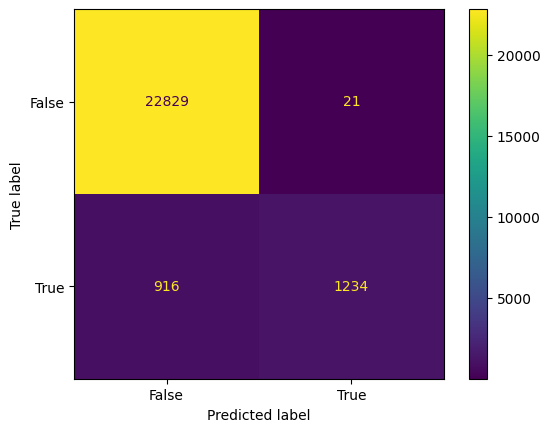

In [18]:
svm_cm = metrics.confusion_matrix(y_test, svm_pred)
svm_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = svm_cm, display_labels = [False, True])

svm_cm_display.plot()
plt.show()

In [ ]:
svm_params = [
{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
{'C':  [0.1, 1, 10, 100], 'gamma':  [0.1, 1, 10, 100], 'kernel': ['rbf']}
]
svm_gridcv_model = GridSearchCV(estimator=svm_model, param_grid=svm_params, cv=10, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of support vector machine grid search model: {}".format(svm_gridcv_model.best_params_))
print('svm gridcv model accuracy score = {}'.format(svm_gridcv_model.best_score_))

**Naive Bayes GuassianNB**

In [19]:
from sklearn.naive_bayes import GaussianNB

naiveB_model = GaussianNB().fit(X_train, y_train)
naiveBpred = naiveB_model.predict(X_Test)

print("NaiveBayes Accuracy Rate: ", accuracy_score(y_test, naiveBpred)*100)
print("NaiveBayes Precision Rate: ", precision_score(y_test, naiveBpred)*100)
print("NaiveBayes Recall Rate: ", recall_score(y_test, naiveBpred)*100)
print("NaiveBayes F1 Score Rate: ", f1_score(y_test, naiveBpred)*100)

NaiveBayes Accuracy Rate:  90.572
NaiveBayes Precision Rate:  46.492714334124024
NaiveBayes Recall Rate:  63.813953488372086
NaiveBayes F1 Score Rate:  53.793373848265034


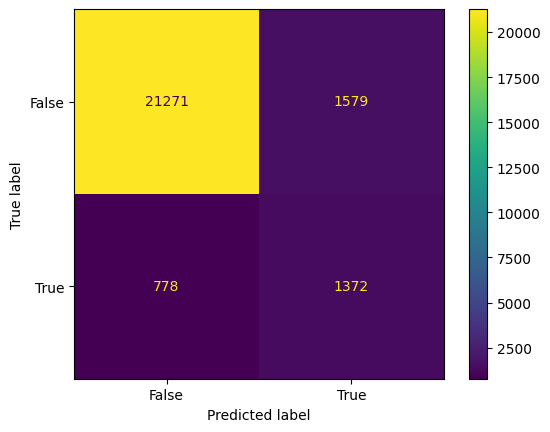

In [20]:
naiveB_cm = metrics.confusion_matrix(y_test, naiveBpred)
naiveB_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = naiveB_cm, display_labels = [False, True])

naiveB_cm_display.plot()
plt.show()

In [ ]:
naiveB_params = {'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]}

naiveB_gridcv_model = GridSearchCV(estimator=naiveB_model, param_grid=naiveB_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of SVM grid search model: {}".format(naiveB_gridcv_model.best_params_))
print('svm gridcv model accuracy score = {}'.format(naiveB_gridcv_model.best_score_))

**K-Nearest Neighbor**

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier().fit(X_train,y_train)
knn_pred = knn_model.predict(X_Test)

print("KNeighborsClassifier Accuracy Rate: ", accuracy_score(y_test, knn_pred)*100)
print("KNeighborsClassifier Precision Rate: ", precision_score(y_test, knn_pred)*100)
print("KNeighborsClassifier Recall Rate: ", recall_score(y_test, knn_pred)*100)
print("KNeighborsClassifier F1 Score Rate: ", f1_score(y_test, knn_pred)*100)

KNeighborsClassifier Accuracy Rate:  96.00800000000001
KNeighborsClassifier Precision Rate:  89.6694214876033
KNeighborsClassifier Recall Rate:  60.55813953488373
KNeighborsClassifier F1 Score Rate:  72.29317046085508


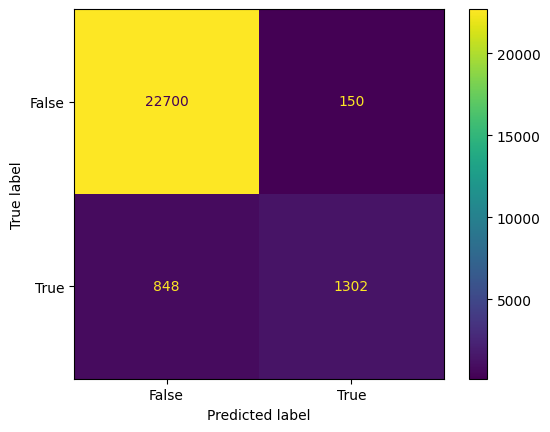

In [22]:
knn_cm = metrics.confusion_matrix(y_test, knn_pred)
knn_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = knn_cm, display_labels = [False, True])

knn_cm_display.plot()
plt.show()

In [ ]:
knn_params = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}

knn_gridcv_model = GridSearchCV(estimator=knn_model, param_grid=knn_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of KNN grid search model: {}".format(knn_gridcv_model.best_params_))
print('svm gridcv model accuracy score = {}'.format(knn_gridcv_model.best_score_))

**Logistic Regression**

In [23]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression().fit(X_train, y_train)
LR_pred = LR_model.predict(X_Test)

print("LogisticRegression Accuracy Rate: ", accuracy_score(y_test, LR_pred)*100)
print("LogisticRegression Precision Rate: ", precision_score(y_test, LR_pred)*100)
print("LogisticRegression Recall Rate: ", recall_score(y_test, LR_pred)*100)
print("LogisticRegression F1 Score Rate: ", f1_score(y_test, LR_pred)*100)

LogisticRegression Accuracy Rate:  95.848
LogisticRegression Precision Rate:  86.53088042049934
LogisticRegression Recall Rate:  61.25581395348837
LogisticRegression F1 Score Rate:  71.73202614379085


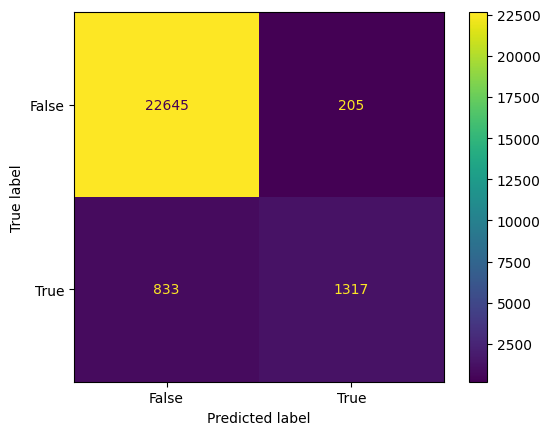

In [24]:
LR_cm = metrics.confusion_matrix(y_test, LR_pred)
LR_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = LR_cm, display_labels = [False, True])

LR_cm_display.plot()
plt.show()

In [ ]:
LR_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100], "penalty": ['l2', 'none'] }

LR_gridcv_model = GridSearchCV(estimator=LR_model, param_grid=LR_params, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise', verbose=2).fit(X_train,y_train)
print("best params of logistic regression grid search model: {}".format(LR_gridcv_model.best_params_))
print('svm gridcv model accuracy score = {}'.format(LR_gridcv_model.best_score_))

**Multi-Layer Perceptron**

In [25]:
from sklearn.neural_network import MLPClassifier

Mlp_model = MLPClassifier().fit(X_train, y_train)
Mlp_pred = Mlp_model.predict(X_Test)

print("MLPClassifier Accuracy Rate: ", accuracy_score(y_test, Mlp_pred)*100)
print("MLPClassifier Precision Rate: ", precision_score(y_test, Mlp_pred)*100)
print("MLPClassifier Recall Rate: ", recall_score(y_test, Mlp_pred)*100)
print("MLPClassifier F1 Score Rate: ", f1_score(y_test, Mlp_pred)*100)

MLPClassifier Accuracy Rate:  97.116
MLPClassifier Precision Rate:  97.85666443402545
MLPClassifier Recall Rate:  67.95348837209302
MLPClassifier F1 Score Rate:  80.20861926983255


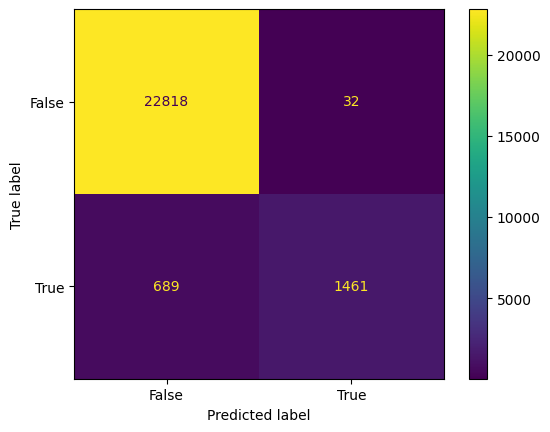

In [26]:
Mlp_cm = metrics.confusion_matrix(y_test, Mlp_pred)
Mlp_cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Mlp_cm, display_labels = [False, True])

Mlp_cm_display.plot()
plt.show()

In [ ]:
Mlp_params = {
    "hidden_layer_sizes": [(10,), (50,), (100,)],
    "activation": ['logistic', 'tanh', 'relu'],
    "alpha": [0.001, 0.01, 0.1],
    "learning_rate": ['constant', 'adaptive']
}

Mlp_gridcv_model = GridSearchCV(estimator=Mlp_model, param_grid=Mlp_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=2).fit(X_train,y_train)
print("best params of mlp classifier grid search model: {}".format(Mlp_gridcv_model.best_params_))
print('svm gridcv model accuracy score = {}'.format(Mlp_gridcv_model.best_score_))